 # Insurance Model

Predict insurance charges using machine learning models.

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Data Encoding](#2.1)
    * [3.2. Train/Test Split](#2.2)       
    * [3.3. Data Scaling](#2.3)
    * [3.4. Feature slelection](#2.4)
* [4. Machine Learning Models](#4)        
    * [4.1. Train 6 Machine Learning Models](#4.1)
       * [4.1.1 Kernel Ridge Regression](#4.1.1)
       * [4.1.2 Kernel Ridge Regression with classification](#4.1.2)
       * [4.1.3 KNN](#4.1.3)
       * [4.1.4 Support Vector Regression](#4.1.4)
       * [4.1.5 Random forrest](#4.1.5)
       * [4.1.6 Decision Tree](#4.1.6)
    * [4.2. Compare Models](#4.2)
* [5. Model Explaination](#5)  


<a id='0'></a>
# 1. Problem Definition

Develop and compare multiple machine learning regression models to predict clients’ insurance charges.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1'></a>
## 2.1. Loading Libraries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

<a id='1.2'></a>
## 2.2. Load Dataset

In [73]:
df = pd.read_csv('https://storage.googleapis.com/public-quant/course//content/insurance.csv').dropna()

<a id='2'></a>
# 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Data Encoding

In [74]:
mydata=df.to_numpy()
n=mydata.shape[0]

In [75]:
#perform one hot encoding on categorical data

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

mydata1=mydata[:,1].reshape((n,1))
mydata4=mydata[:,4].reshape((n,1))
mydata5=mydata[:,5].reshape((n,1))
mydatasex=enc.fit_transform(mydata1)
mydatasmoker=enc.fit_transform(mydata4)
mydataregion=enc.fit_transform(mydata5)

#combine data together
mydata_new=np.hstack((mydata[:,0].reshape((n,1)),mydata[:,2:4],mydatasex,mydatasmoker,mydataregion,mydata[:,-1].reshape((n,1))))

<a id='2.2'></a>
## 3.2. Train/Test Split


In [76]:
#split train,validation and test data
X=mydata_new[:,0:-1]
Y=mydata_new[:,-1].reshape((n,1))
X_train1, X_test1, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #get test set
print(X_train1.shape,X_test1.shape)

(1070, 11) (268, 11)


<a id='2.3'></a>
## 3.3. Data Scaling
After the test data is seperated, now perform data scaling on training data. And apply the same scaler on validation data.

In [77]:
#scale the data (numerical values)
X_trainscalepart=X_train1[:,0:3]
scaler.fit(X_trainscalepart)
X_trainn=scaler.transform(X_trainscalepart)
mynewtrain=np.hstack((X_trainn,X_train1[:,3:])) #combine data together

trainnum=X_train1.shape[0] #number of training examples

<a id='2.4'></a>
## 3.4. Feature Selection

Before feature selection, computer the covariance matrix to see the interrealtionships. Also visualize the data.

In [78]:
#correlation matrix
mydatacov=np.hstack((mynewtrain,y_train))
df1 = pd.DataFrame(mydatacov,columns=['age','bmi','children','female','male','nonsmoker','smoker','ne','nw','se','sw','charge'])
df1.corr()

,age,bmi,children,female,male,nonsmoker,smoker,ne,nw,se,sw,charge
age,1.000000,0.118274,0.060999,0.008459,-0.008459,0.052035,-0.052035,-0.019700,0.013019,-0.015068,0.022307,0.281721
bmi,0.118274,1.000000,-0.005040,-0.015293,0.015293,0.003450,-0.003450,-0.151206,-0.112666,0.247317,0.010248,0.197316
children,0.060999,-0.005040,1.000000,-0.017080,0.017080,-0.013994,0.013994,-0.004791,0.033319,-0.025133,-0.002450,0.071885
female,0.008459,-0.015293,-0.017080,1.000000,-1.000000,0.070908,-0.070908,-0.005427,-0.017047,0.008217,0.013911,-0.056802
male,-0.008459,0.015293,0.017080,-1.000000,1.000000,-0.070908,0.070908,0.005427,0.017047,-0.008217,-0.013911,0.056802
nonsmoker,0.052035,0.003450,-0.013994,0.070908,-0.070908,1.000000,-1.000000,-0.011237,0.030547,-0.051450,0.033688,-0.780063
smoker,-0.052035,-0.003450,0.013994,-0.070908,0.070908,-1.000000,1.000000,0.011237,-0.030547,0.051450,-0.033688,0.780063
ne,-0.019700,-0.151206,-0.004791,-0.005427,0.005427,-0.011237,0.011237,1.000000,-0.323374,-0.345783,-0.330014,-0.000628
nw,0.013019,-0.112666,0.033319,-0.017047,0.017047,0.030547,-0.030547,-0.323374,1.000000,-0.336290,-0.320954,-0.033776
se,-0.015068,0.247317,-0.025133,0.008217,-0.008217,-0.051450,0.051450,-0.345783,-0.336290,1.000000,-0.343194,0.067491


<Axes: title={'center': 'Correlation Matrix'}>

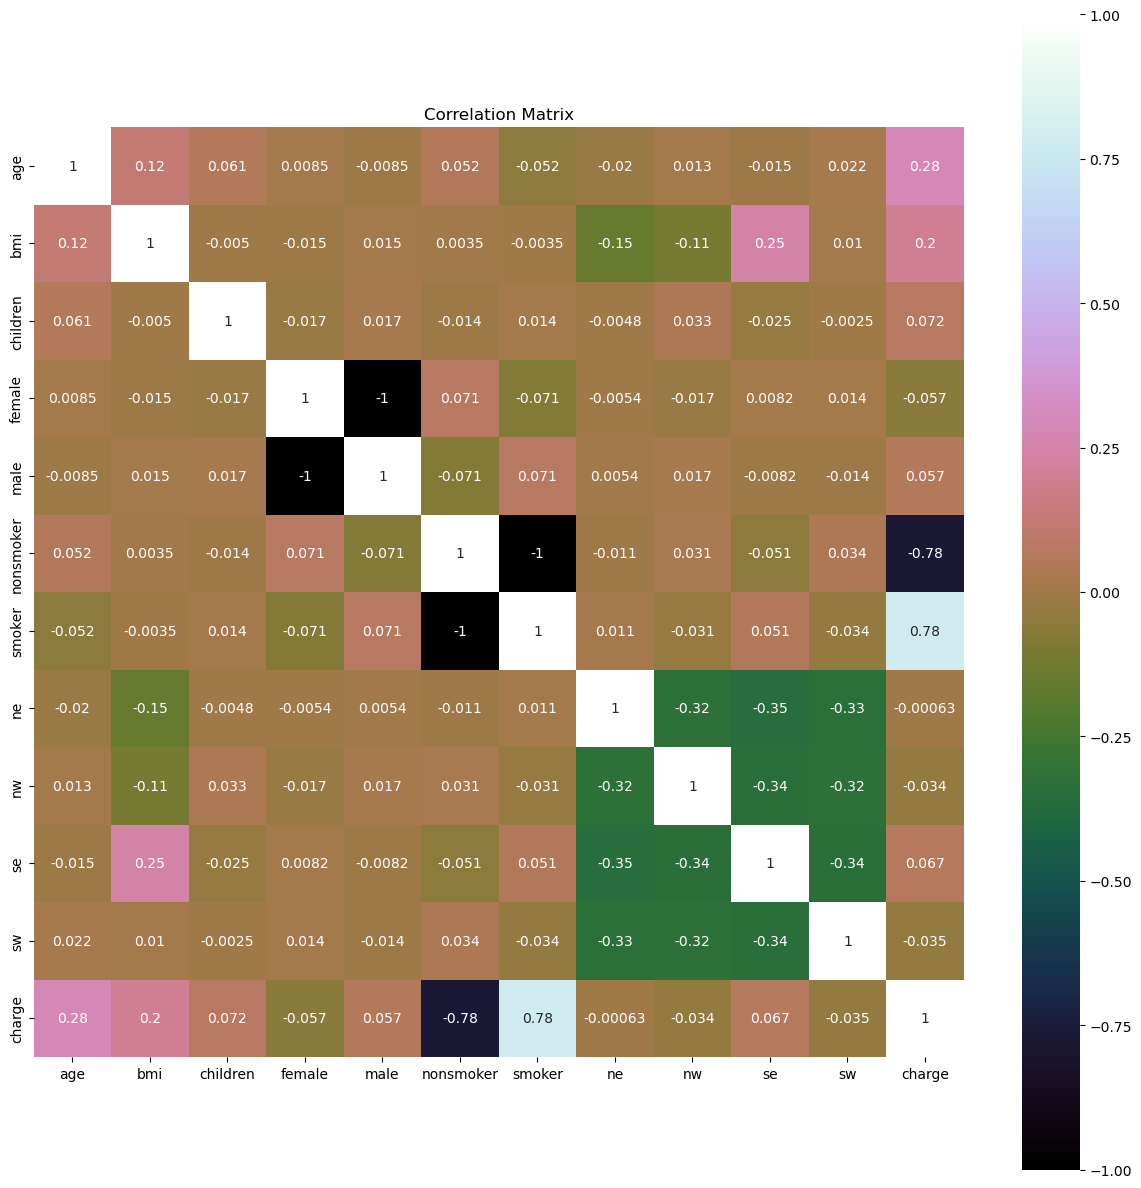

In [79]:
# correlation plot
correlation = df1.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Here from the correlation, age, bmi, smoker, seems to be very correlated with the charge.

In [80]:
#display the training data and its descriptions
display(df1)
df1.describe()

,age,bmi,children,female,male,nonsmoker,smoker,ne,nw,se,sw,charge
0,0.472227,-1.756525,0.734336,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9193.8385
1,0.543313,-1.033082,-0.911192,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8534.6718
2,0.898745,-0.943687,-0.911192,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,27117.99378
3,-0.025379,0.622393,3.202629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8596.8278
4,1.040918,-1.504893,1.5571,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12475.3513
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,-1.518194,0.130717,2.379865,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4561.1885
1066,-0.025379,-1.107579,3.202629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8582.3023
1067,1.325264,-0.891539,-0.911192,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,11931.12525
1068,-0.167551,2.820864,0.734336,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,46113.511


,age,bmi,children,female,male,nonsmoker,smoker,ne,nw,se,sw,charge
count,1070.000000,1070.000000,1070.000000,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0000
unique,47.000000,494.000000,6.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1070.0000
top,-1.518194,0.287987,-0.911192,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9193.8385
freq,61.000000,12.000000,456.000000,548.0,548.0,850.0,850.0,803.0,814.0,787.0,806.0,1.0000


<Figure size 5000x5000 with 0 Axes>

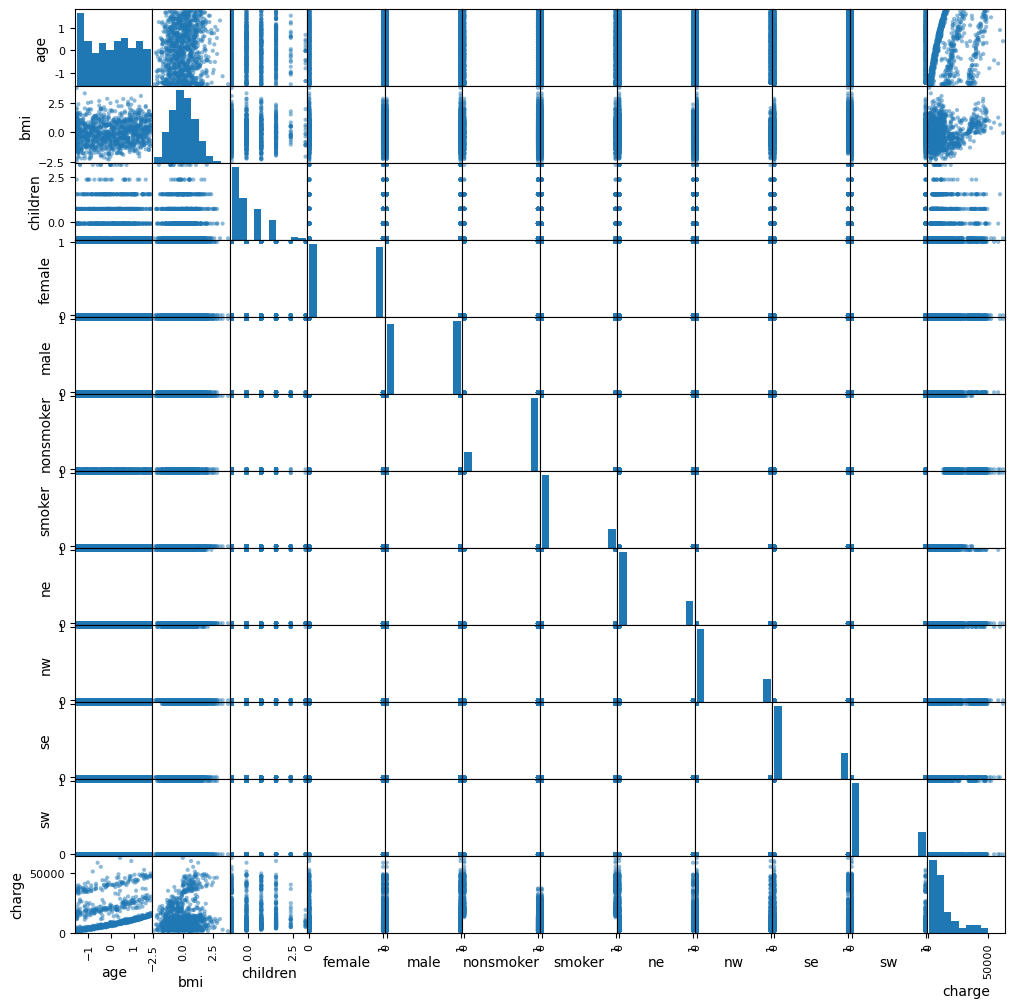

In [81]:
#visualize the data relationships with y
df2=df1.convert_dtypes()
plt.figure(figsize=(50,50))
scatter_matrix(df2,figsize=(12,12))
plt.show()

Here from the age-charge plot we can see that the underlying data is not lienar, but in each class, the charge is positively related to the age.
There is weak linear trend between bmi and charges.
There relationship between charges and other features is not immediatly obvious. 
So I will first use LASSO regression to also see what are features selected.
However, since the data is not linear, I seperated the data into 3 catagories and used LASSO on each class.

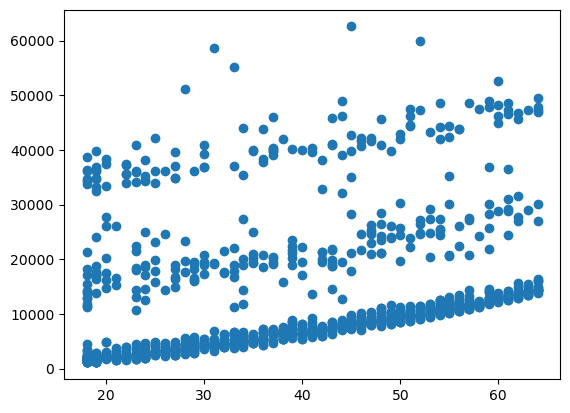

In [82]:
pyplot.scatter(X_train1[:,0],y_train[:,-1])

In [83]:
y_class=np.zeros((trainnum,)) #create new target variable

for i in range(trainnum):
    #equations determined with trial and error
    k=X_train1[i,0]*240+1200 
    k2=X_train1[i,0]*240+24200
    if (y_train[i]<k):
        y_class[i]=0
    elif (y_train[i]<k2):
        y_class[i]=1
    else:
        y_class[i]=2

In [84]:
def featureselection(c,X,y,ylabel):
    idxc1=np.argwhere(ylabel==c)
    idxc1=idxc1[:,0]
    ytrainc1=y[idxc1]
    Xtrainc1=X[idxc1,:]
    clfla = linear_model.Lasso(alpha=100)
    clfla.fit(Xtrainc1, ytrainc1)
    
    print(clfla.coef_)


In [85]:
featureselection(0,mynewtrain,y_train,y_class)
featureselection(1,mynewtrain,y_train,y_class)
featureselection(2,mynewtrain,y_train,y_class)

[3671.09953857    0.          436.24883885   59.93952313   -0.
    0.            0.            0.            0.           -0.
   -0.        ]
[ 3.58263712e+03  3.13142495e+02  5.20317933e+02  5.07153400e+02
 -7.90958408e-14  1.72088894e+02 -0.00000000e+00  0.00000000e+00
  1.21285109e+03 -0.00000000e+00 -0.00000000e+00]
[ 3.78728504e+03  2.47792582e+03  1.18840823e+02  2.85609301e+02
 -2.03966503e-13  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.18700869e+03 -0.00000000e+00 -0.00000000e+00]


In [86]:
def regionavg(col):
    idxarea=np.argwhere(mynewtrain[:,col]==1)
    print(np.average(y_train[idxarea]))

regionavg(7)
regionavg(8)
regionavg(9)
regionavg(10)

13333.008790711612
12622.51424597656
14698.242993074204
12611.500972651509


To further investigate the relationship between charges and region, I calculated the average charges for each region. It turns out that the averages are different. So instead of one-hot encoding, I will use numerical values (0.25,0.5,0.75,1) according to acending average charges.

In [87]:
X_trainarea=np.zeros((trainnum,1))
for i in range(trainnum):
    if mynewtrain[i,7]==1:
        X_trainarea[i]=0.75
    elif mynewtrain[i,8]==1:
        X_trainarea[i]=0.5
    elif mynewtrain[i,9]==1:
        X_trainarea[i]=1
    else:
        X_trainarea[i]=0.25

testnum=X_test1.shape[0]
X_testarea=np.zeros((testnum,1))
for i in range(testnum):
    if X_test1[i,7]==1:
        X_testarea[i]=0.75
    elif X_test1[i,8]==1:
        X_testarea[i]=0.5
    elif X_test1[i,9]==1:
        X_testarea[i]=1
    else:
        X_testarea[i]=0.25

Combined with the LASSO results, I will select age, bmi, children, smoker, region as my features for prediction.

In [88]:
#training data
mynewtrain=np.hstack((X_trainn[:,0:3],X_train1[:,6].reshape((trainnum,1)),X_trainarea))

#test set

X_testscalepart=X_test1[:,0:3]
X_testn=scaler.transform(X_testscalepart)
mynewtest=np.hstack((X_testn[:,0:3],X_test1[:,6].reshape((testnum,1)),X_testarea))

<a id='4'></a>
# 4. Machine Learning Models

I will train 6 Machine learning models.

<a id='4.1'></a>
## 4.1. Train 6 Machine Learning Models

Since the data is nonlinear, OLS will not be suitable. Instead, I will use Ridge regression with polynomial kernels in the hope that polynoimal feature tranformation can capture the nonlinearities of the data. KNN, Decision Tree and Random forrest are non-linear models that seems to be suitable. To capture the nonlinearities of the data, I will also use Support Vector Regression.
So, the 6 models will be:
1. Kernel Ridge Regression
2. Kernel Ridge Regression with classification
3. KNN
4. Support Vector Regression
5. Random forrest
6. Decision Tree

<a id='4.1.1'></a>
### 4.1.1 Kernel Ridge Regression

In [25]:
alpha=[0.001,0.01,0.1,1,10,100]
degree=[1,2,3,4,5,6]

scoreopt=-np.inf #score for validation set
al=0 #best alpha
de=0 #best degree

for a in alpha:
    for d in degree:
        clfkr = KernelRidge(alpha=a, kernel='polynomial',degree=d) #regression model
        cv_results = cross_validate(clfkr, mynewtrain,y_train, cv=5, scoring=('neg_mean_squared_error' )) #cross validation
        score = np.average(cv_results['test_score'])
        #print(cv_results['test_score'],'  ',d,'  ',a)
        
        if (scoreopt<score): #find best score
            scoreopt=score
            al=a
            de=d

print(de,al)

clfkr = KernelRidge(alpha=al, kernel='polynomial',degree=de) #Now use best hyperparameters found
clfkr.fit(mynewtrain,y_train)
predval=clfkr.predict(mynewtest).reshape(y_test.shape)-y_test

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

errval=np.sum(predval**2)
r=1-errval/tss #calculate r^2
print('Kernel Ridge Regression r^2', r)

rmse=(errval/y_test.shape[0])**0.5
print('rmse', rmse)


2 0.01
Kernel Ridge Regression r^2 0.8687485573760094
rmse 4514.046961855826


The RMSE is not small, so plot the histogram of the prediction error |f(x)-y| to see its distribution.

(array([19., 31., 54., 58., 36., 17.,  5.,  1.,  6.,  3.,  4.,  2.,  4.,
         2.,  2.,  2.,  2.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,
         2.,  1.,  3.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([   50.49258377,   493.93421039,   937.375837  ,  1380.81746362,
         1824.25909023,  2267.70071685,  2711.14234346,  3154.58397008,
         3598.02559669,  4041.46722331,  4484.90884992,  4928.35047654,
         5371.79210315,  5815.23372977,  6258.67535638,  6702.116983  ,
         7145.55860961,  7589.00023623,  8032.44186285,  8475.88348946,
         8919.32511608,  9362.76674269,  9806.20836931, 10249.64999592,
        10693.09162254, 11136.53324915, 11579.97487577, 12023.41650238,
        12466.858129  , 12910.29975561, 13353.74138223, 13797.18300884,
        14240.62463546, 14684.06626207, 15127.50788869, 15570.9495153 ,
        16014.39114192, 16457.83276853, 16901.27439515, 17344.716021

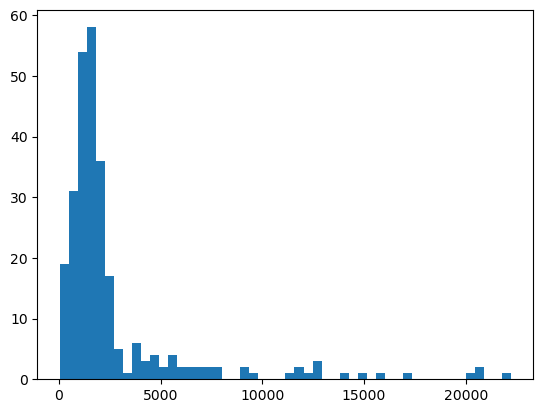

In [26]:
pyplot.hist(np.abs(predval), bins=50)

<a id='4.1.2'></a>
### 4.1.2 Kernel Ridge Regression with classification
Since the age-charge plot suggests that the data can be seperated into 3 classes. For this approach, I will create labels using training data for 3 classes, train a softmax classifier. Then, train a regression model for each class. For prediction, I will first do classification on the test data, and then run Kernel regression on each class.

In [27]:
clflr = LogisticRegression(random_state=None, multi_class='multinomial',max_iter=1000)
clflr.fit(mynewtrain,y_class)

LogisticRegression(max_iter=1000, multi_class='multinomial')

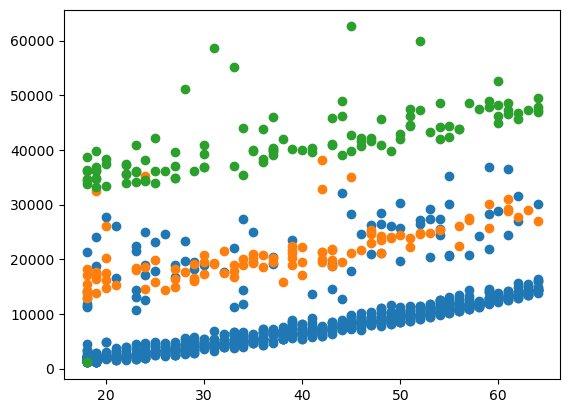

In [28]:
y_pred = clflr.predict(mynewtrain)
idx=np.argwhere(y_pred==0)
pyplot.scatter(X_train1[idx,0],y_train[idx,0])

idx=np.argwhere(y_pred==1)
pyplot.scatter(X_train1[idx,0],y_train[idx,0])

idx=np.argwhere(y_pred==2)
pyplot.scatter(X_train1[idx,0],y_train[idx,0])



The classifier works fine. It seems that the class in the middle is hard to predict correctly.

In [29]:
#now run kernel regression on each class

def kernelreg(Xt,yt,xtestt,ytestt,c,y_class):
    #get the training data for each class
    idx=np.argwhere(y_class==c)
    num=idx.shape[0]
    X=Xt[idx,:].reshape((num,Xt.shape[1]))
    y=yt[idx,:].reshape((num,1))

    #first predict the test data to be of which class, then it will run the predictor on the test data of class c
    pred=clflr.predict(xtestt)
    idxc=np.argwhere(pred==c)
    num=idxc.shape[0]
    
    #only select test data of class c
    xtest=xtestt[idxc,:].reshape((num,Xt.shape[1]))
    ytest=ytestt[idxc,:].reshape((num,1))

    alpha=[0.01,0.001,0.0001,1,10]
    degree=[1,2,3,4,5,6]

    scoreopt=-np.inf #score for validation set
    al=0 #best alpha
    de=0 #best degree
    
    for a in alpha:
        for d in degree:
            clf1 = KernelRidge(alpha=a, kernel='polynomial',degree=d) #regression model
            cv_results = cross_validate(clf1, X,y, cv=5, scoring=('neg_mean_squared_error')) #cross validation
            score = np.average(cv_results['test_score'])
            if (scoreopt<score): #find best score
                scoreopt=score
                al=a
                de=d


    print(de,al)
    
    clf = KernelRidge(alpha=al, kernel='polynomial',degree=de) #Now use best hyperparameters found
    clf.fit(mynewtrain,y_train)
    predval=clf.predict(xtest).reshape(ytest.shape)-ytest

    avg1=np.average(ytest)
    tss1=np.sum((ytest-np.ones(ytest.shape)*avg1)**2)

    errval=np.sum(predval**2) #RSS


    return clf1,errval,predval


In [30]:
clf_c0,err0,p1=kernelreg(mynewtrain,y_train,mynewtest,y_test,0,y_class)

clf_c1,err1,p2=kernelreg(mynewtrain,y_train,mynewtest,y_test,1,y_class)

clf_c2,err2,p3=kernelreg(mynewtrain,y_train,mynewtest,y_test,2,y_class)

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

print('Kernel Ridge Regression r^2', 1-(err0+err1+err2)/tss)

print('rmse', ((err0+err1+err1)/y_test.shape[0])**0.5)

2 0.001
2 1
1 0.01
Kernel Ridge Regression r^2 0.8303298945038893
rmse 4741.754915797017


(array([19., 24., 52., 60., 34., 12.,  3.,  1.,  2.,  2.,  2.,  2.,  2.,
        10.,  8.,  5.,  4.,  2.,  3.,  2.,  0.,  3.,  0.,  0.,  0.,  1.,
         2.,  0.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  1.,  1.]),
 array([   25.62515308,   480.10409626,   934.58303943,  1389.0619826 ,
         1843.54092578,  2298.01986895,  2752.49881213,  3206.9777553 ,
         3661.45669848,  4115.93564165,  4570.41458482,  5024.893528  ,
         5479.37247117,  5933.85141435,  6388.33035752,  6842.8093007 ,
         7297.28824387,  7751.76718704,  8206.24613022,  8660.72507339,
         9115.20401657,  9569.68295974, 10024.16190292, 10478.64084609,
        10933.11978927, 11387.59873244, 11842.07767561, 12296.55661879,
        12751.03556196, 13205.51450514, 13659.99344831, 14114.47239149,
        14568.95133466, 15023.43027783, 15477.90922101, 15932.38816418,
        16386.86710736, 16841.34605053, 17295.82499371, 17750.303936

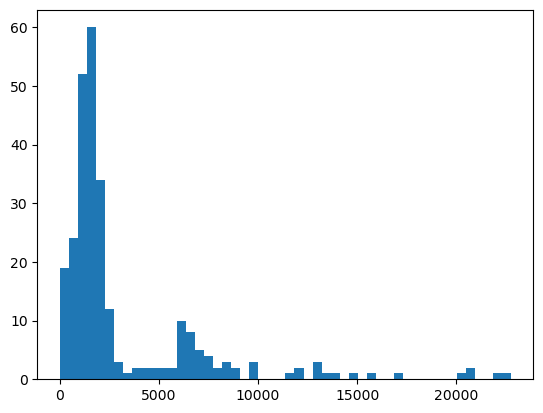

In [31]:
pyplot.hist(np.abs(np.vstack((p1,p2,p3))), bins=50)

<a id='4.1.3'></a>
### 4.1.3 KNN

In [90]:
nein=[1,2,3,4,5,6,8,10,15] #neighbour value
pvalue=[1,2,3] #p-norm value

scoreopt=-np.inf #score for validation set
al=0 #best neighbour value
de=0 #best p-norm
    
for a in nein:
    for d in pvalue:
        clf1 = KNeighborsRegressor(n_neighbors=a,p=d,weights='distance') #regression model
        cv_results = cross_validate(clf1, mynewtrain,y_train, cv=5, scoring=('neg_mean_squared_error')) #cross validation
        score = np.average(cv_results['test_score'])
        if (scoreopt<score): #find best score
            scoreopt=score
            al=a
            de=d

print(de,al)

neigh = KNeighborsRegressor(n_neighbors=al,p=d,weights='distance') #Now use best hyperparameters found
neigh.fit(mynewtrain,y_train)
predval=neigh.predict(mynewtest).reshape(y_test.shape)-y_test

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

errval=np.sum(predval**2)
r=1-errval/tss #calculate r^2
print('KNN Regression r^2', r)

rmse=(errval/y_test.shape[0])**0.5
print('rmse', rmse)

3 10
KNN Regression r^2 0.8194337787618967
rmse 5294.589388940228


(array([98., 55., 32., 26., 13.,  8.,  6.,  3.,  3.,  4.,  1.,  2.,  2.,
         1.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0.        ,   826.81027913,  1653.62055827,  2480.4308374 ,
         3307.24111654,  4134.05139567,  4960.86167481,  5787.67195394,
         6614.48223308,  7441.29251221,  8268.10279135,  9094.91307048,
         9921.72334962, 10748.53362875, 11575.34390789, 12402.15418702,
        13228.96446615, 14055.77474529, 14882.58502442, 15709.39530356,
        16536.20558269, 17363.01586183, 18189.82614096, 19016.6364201 ,
        19843.44669923, 20670.25697837, 21497.0672575 , 22323.87753664,
        23150.68781577, 23977.49809491, 24804.30837404, 25631.11865318,
        26457.92893231, 27284.73921144, 28111.54949058, 28938.35976971,
        29765.17004885, 30591.98032798, 31418.79060712, 32245.600886

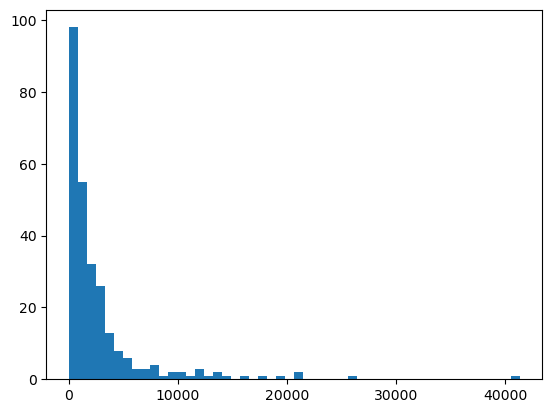

In [91]:
pyplot.hist(np.abs(predval), bins=50)

<a id='4.1.4'></a>
### 4.1.4 Support Vector Regression

In [92]:
cvalue=[1,10,100,1000,10000,100000] #C value
eps=[0.001,0.1,1,10,100] #epsilon value

scoreopt=-np.inf #score for validation set
al=0 #best C
de=0 #best epsilon
    
for a in cvalue:
    for d in eps:
        clf1 = SVR(C=a, epsilon=d ) 
        cv_results = cross_validate(clf1, mynewtrain,np.ravel(y_train), cv=5, scoring=('neg_mean_squared_error')) #cross validation
        score = np.average(cv_results['test_score'])
        if (scoreopt<score): #find best score
            scoreopt=score
            al=a
            de=d

print(de,al)

clf1 = SVR(C=al, epsilon=de)  #Now use best hyperparameters found
clf1.fit(mynewtrain,np.ravel(y_train))
predval=clf1.predict(mynewtest).reshape(y_test.shape)-y_test

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

errval=np.sum(predval**2)
r=1-errval/tss #calculate r^2
print('SVC Regression r^2', r)

rmse=(errval/y_test.shape[0])**0.5
print('rmse', rmse)

10 100000
SVC Regression r^2 0.8702291682500569
rmse 4488.513898141679


(array([160.,  50.,   8.,   7.,   6.,   3.,   1.,   0.,   2.,   0.,   2.,
          4.,   1.,   1.,   0.,   1.,   1.,   3.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,   1.,
          2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   2.,   1.]),
 array([3.73147830e-01, 4.46831263e+02, 8.93289378e+02, 1.33974749e+03,
        1.78620561e+03, 2.23266372e+03, 2.67912184e+03, 3.12557995e+03,
        3.57203807e+03, 4.01849618e+03, 4.46495430e+03, 4.91141241e+03,
        5.35787053e+03, 5.80432864e+03, 6.25078676e+03, 6.69724487e+03,
        7.14370299e+03, 7.59016110e+03, 8.03661922e+03, 8.48307733e+03,
        8.92953545e+03, 9.37599356e+03, 9.82245168e+03, 1.02689098e+04,
        1.07153679e+04, 1.11618260e+04, 1.16082841e+04, 1.20547423e+04,
        1.25012004e+04, 1.29476585e+04, 1.33941166e+04, 1.38405747e+04,
        1.42870328e+04, 1.47334909e+04, 1.51799491e+04, 1.56264072e+04,
        1.

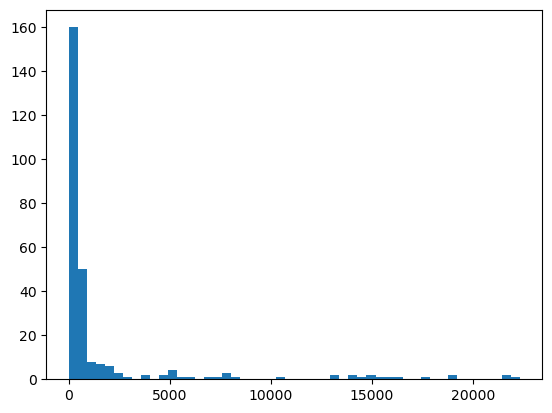

In [93]:
pyplot.hist(np.abs(predval), bins=50)

<a id='4.1.5'></a>
### 4.1.5 Random forrest

In [94]:
depth=[None,1,2,3,4,5,6] #tree depth

scoreopt=-np.inf #score for validation set
al=0 #best tree depth

    
for a in depth:
    clfrf = RandomForestRegressor(max_depth=a, random_state=1) #regression model
    cv_results = cross_validate(clfrf, mynewtrain,np.ravel(y_train), cv=5, scoring=('neg_mean_squared_error')) #cross validation
    score = np.average(cv_results['test_score'])
    if (scoreopt<score): #find best score
        scoreopt=score
        al=a

print(al)

clfrf = RandomForestRegressor(max_depth=al, random_state=1) #Now use best hyperparameters found
clfrf.fit(mynewtrain,np.ravel(y_train))

predval=clfrf.predict(mynewtest).reshape(y_test.shape)-y_test

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

errval=np.sum(predval**2)
r=1-errval/tss #calculate r^2
print('Random Forrest Regression r^2', r)

rmse=(errval/y_test.shape[0])**0.5
print('rmse', rmse)


4
Random Forrest Regression r^2 0.8715041351255101
rmse 4466.4101942950665


(array([21., 32., 47., 42., 46., 26., 17.,  5.,  1.,  2.,  3.,  2.,  2.,
         1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  3.,  0.,  1.,  1.,  3.,  1.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([9.10796958e-01, 4.33201770e+02, 8.65492743e+02, 1.29778372e+03,
        1.73007469e+03, 2.16236566e+03, 2.59465664e+03, 3.02694761e+03,
        3.45923858e+03, 3.89152956e+03, 4.32382053e+03, 4.75611150e+03,
        5.18840248e+03, 5.62069345e+03, 6.05298442e+03, 6.48527540e+03,
        6.91756637e+03, 7.34985734e+03, 7.78214832e+03, 8.21443929e+03,
        8.64673026e+03, 9.07902123e+03, 9.51131221e+03, 9.94360318e+03,
        1.03758942e+04, 1.08081851e+04, 1.12404761e+04, 1.16727671e+04,
        1.21050580e+04, 1.25373490e+04, 1.29696400e+04, 1.34019310e+04,
        1.38342219e+04, 1.42665129e+04, 1.46988039e+04, 1.51310949e+04,
        1.55633858e+04, 1.59956768e+04, 1.64279678e+04, 1.68602588e+

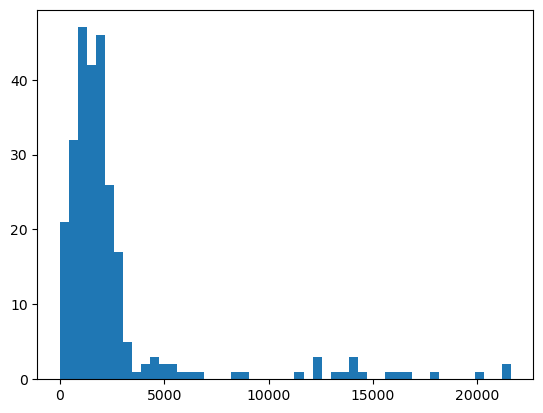

In [95]:
pyplot.hist(np.abs(predval), bins=50)

<a id='4.1.6'></a>
### 4.1.6 Decision Tree

In [96]:
depth=[5,10,20,30,40,50] #tree depth

scoreopt=-np.inf #score for validation set
al=0 #best tree depth

    
for a in depth:
    clf1 = DecisionTreeRegressor(max_depth=a, random_state=1) #regression model
    cv_results = cross_validate(clf1, mynewtrain,np.ravel(y_train), cv=5, scoring=('neg_mean_squared_error')) #cross validation
    score = np.average(cv_results['test_score'])
    if (scoreopt<score): #find best score
        scoreopt=score
        al=a

print(al)

clf = DecisionTreeRegressor(max_depth=al, random_state=1) #Now use best hyperparameters found
clf.fit(mynewtrain,np.ravel(y_train))

predval=clf.predict(mynewtest).reshape(y_test.shape)-y_test

avg=np.average(y_test)
tss=np.sum((y_test-np.ones(y_test.shape)*avg)**2)

errval=np.sum(predval**2)
r=1-errval/tss #calculate r^2
print('Decision Tree Regression r^2', r)

rmse=(errval/y_test.shape[0])**0.5
print('rmse', rmse)

5
Decision Tree Regression r^2 0.8302152617823806
rmse 5134.088549581926


(array([32., 41., 31., 29., 29., 26., 19., 13.,  9.,  5.,  2.,  3.,  0.,
         0.,  3.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
         0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  3.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  3.,  0.,  1.,  2.]),
 array([2.18560277e+00, 4.32837443e+02, 8.63489284e+02, 1.29414112e+03,
        1.72479297e+03, 2.15544481e+03, 2.58609665e+03, 3.01674849e+03,
        3.44740033e+03, 3.87805217e+03, 4.30870401e+03, 4.73935585e+03,
        5.17000769e+03, 5.60065953e+03, 6.03131137e+03, 6.46196321e+03,
        6.89261505e+03, 7.32326689e+03, 7.75391873e+03, 8.18457057e+03,
        8.61522241e+03, 9.04587426e+03, 9.47652610e+03, 9.90717794e+03,
        1.03378298e+04, 1.07684816e+04, 1.11991335e+04, 1.16297853e+04,
        1.20604371e+04, 1.24910890e+04, 1.29217408e+04, 1.33523927e+04,
        1.37830445e+04, 1.42136963e+04, 1.46443482e+04, 1.50750000e+04,
        1.55056519e+04, 1.59363037e+04, 1.63669555e+04, 1.67976074e+

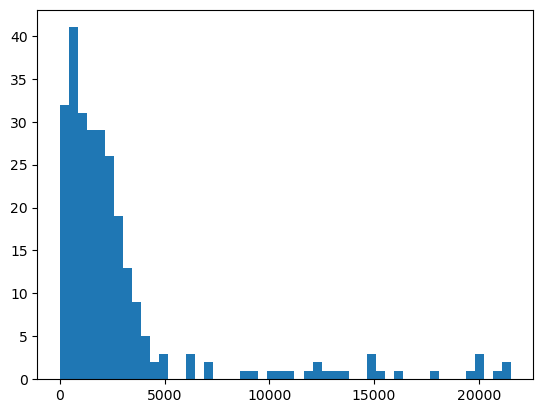

In [97]:
pyplot.hist(np.abs(predval), bins=50)

<a id='4.2'></a>
## 4.2. Compare Models

As can be seen from the results, $R^2$ and RMSE, as the data is nonlinear, the error is not small. 

Compare the 6 models, due to nonilnear data, using $R^2$ and RMSE, Random forrest and Support Vector Regression obtains the best performance. Despite the nonliear data, since age is still very important factor for the charges, Kernel regression's performance is only sightly worse than Random forrest. 

If we focus on the plot, Support Vector Regression predicts over 70% data within 1000 error. While for Random forrest, it predicts over 70% data within 3000 error. So on data error distribition, Support Vector Regression obtains the best performance.

While I hypothesis that classify the data first and then do regression on each catagory might lead to better performance, this is not observed. As the classifier struggles to tell whether the datapoint is in class 0 or class 1.

KNN regression performs the worst on the metric $R^2$ and RMSE. If we use a distance metric tailored to this dataset, its perform might increase. KNN essentially seeks to find the data that is most similar to the test data, as such, if it does find certain points that are similar, then the prediction would have small error. On the other hand, if it cannot find similar data from the training data, then its prediction might deviate a lot.

Apart from the $R^2$ and RMSE, I also plotted the distribution of the prediction error |f(x)-y|. It can be seen that the models performs good on about half of the data, and about 20% it struggles to predict. KNN and Support Vector Regression has similar shapes for the histogram. This is not surprising as the kernels used for Support Vector Regression is the rbf kernels, which is very similar to a distance metric.

<a id='5'></a>
## 5. Models Explaination

I will select random forrest (4.1.5) as the best model. To explain it, I use the help of shap library.

From the previous section, $R^2$ is 0.872 and RMSE is 4466. So the model does better than predicting the average, it can explain about 87% of the varation. RMSE is 4466, it is heavly affected by parts of the dataset where the model is struggling to predict. On the other hand, from the histogram, about 70% of the times, the model can predict with error smaller than 3000. 

<Axes: xlabel='SHAP value (impact on model output)'>

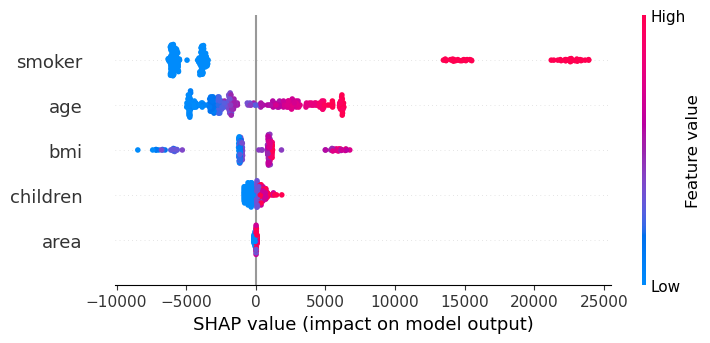

In [69]:
import shap

# explain the model's predictions using SHAP
shap.initjs()
df3=pd.DataFrame(mynewtest,columns=['age','bmi','children','smoker','area'])
explainer = shap.Explainer(clfrf)
shap_values = explainer(df3)
shap.plots.beeswarm(shap_values, show=False)

The above plots the Shapley Distribution. From the plot, for the random forrest model, the features that influence the predictions the most are smoker, age, bmi and children. The trend shown is also reasoable. The charges is expected to be higher if you smoke, are older, has higher bmi or has more children. The influence of area are not very significant. Similarily, the plot below shows feature importance as a numeric value for all rows.

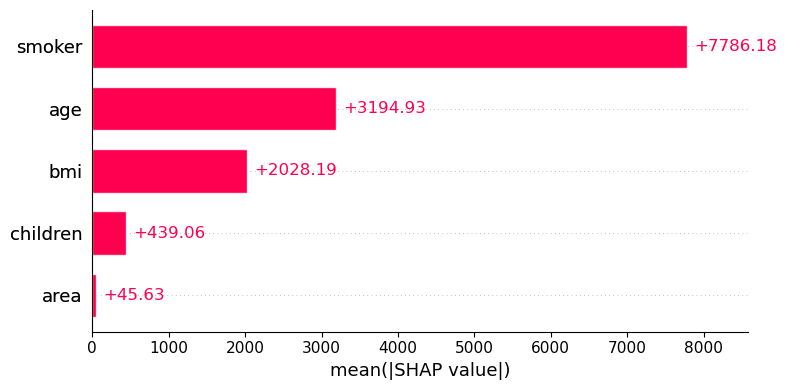

In [70]:
shap.plots.bar(shap_values,show=False)
plt.tight_layout()

In [71]:
shap.initjs()
shap.plots.force(shap_values,show=False)

This seeks the explain the model on a row level. It shows how each feature contribute to push the model output from the average model output value to the model output value.